In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#1.Import data Set,
dfbank=pd.read_csv('bank.csv')
dfbank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [4]:
print(dfbank.head())

   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  


In [ ]:
print(dfbank.info())

In [ ]:
print(dfbank.describe())

In [ ]:
#identify the features data types before entering into analysis
dfbank.dtypes


In [ ]:
#user defined function to updated data types
#created a dictionary to have columns and their correct data types
def datatype_con(dataframe):
    rightcat={
        'age':'int64',
        'job':'object',
        'default':'bool',
        'loan':'bool',
        'y':'object'
    }
    for column,datatype in rightcat.items():
        dataframe[column]=dataframe[column].astype(datatype)
    return dataframe
datatype_con(dfbank)

#converted default y and loan as Bool as they only can be true or false 

In [ ]:
#find duplicated
duplicates = dfbank[dfbank.duplicated(subset=['age', 'balance'])]
duplicates = dfbank[dfbank.duplicated(subset=['age', 'duration'])]
duplicates


In [ ]:
#found duplicated but not removing the same
dfbank

In [ ]:
#Find the average balance of the customer who belongs to the subscribed 
#customer and non-subscribed customer and also use a related plot to show them in visualization
#dfbank.rename(columns={'y':'sub'},inplace=True)


In [ ]:
round(dfbank.groupby('y')['balance'].mean(),2)

In [ ]:
df2=dfbank.groupby('y')['balance'].mean()
df2.plot(kind='bar',edgecolor='yellow')
plt.title('avg balance by subscribed vs non subscribed')
plt.xlabel('subcribed True False')
plt.ylabel('avg balance')
plt.show()

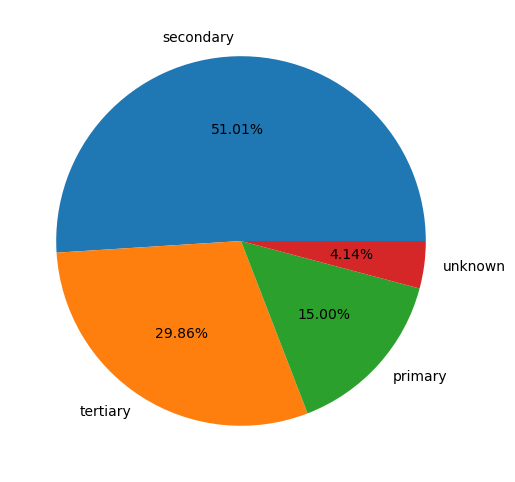

In [5]:
#Use a pie plot to find the distribution(frequency) of the education. 
#Make sure to add labels and show the percentage of each education distribution.
 

x1=dfbank.education.value_counts()
plt.figure(figsize=(8,6))
plt.pie(x=x1,labels=x1.index,autopct='%1.2f%%')
plt.show()

In [ ]:
dfbank.month


In [6]:
#created a function and applied to create a new columns into Dataframes
def mon_to_season(month):
    if month in  ['dec','jan','feb','nov']:
        return 'cold'
    elif month in ['march','april']:
        return 'atumn'
    elif month in ['may','june','july']:
        return 'hot'
    else:
        return 'rainy'
mon_to_season('jan')
dfbank['season']=dfbank.month.apply(mon_to_season)
dfbank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,season
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,rainy
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,hot
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,rainy
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,rainy
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,hot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no,rainy
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no,hot
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no,rainy
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no,cold


In [7]:
#Use the count plot with a variable 
#that you created in the above question and also the Y variable to find the class distribution.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sns.countplot(x='season', hue='y', data=dfbank)
plt.title('Class Distribution by Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.legend(title='Subscription')
plt.show()



In [5]:
#Use the Pdays feature and find does it cause any effect on the subscription of the term using the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='y', y='pdays', data=dfbank)
plt.title('Effect of Pdays on Subscription')
plt.xlabel('Subscription')
plt.ylabel('Pdays')
plt.show()

NameError: name 'sns' is not defined

<Figure size 1000x600 with 0 Axes>

In [8]:
import sys
print(sys.getrecursionlimit()) 

sys.setrecursionlimit(10000) 
sys.getrecursionlimit()

10000


10000

In [9]:
dfbank['pdays'].replace(-1, pd.NA, inplace=True)
#im stuck on recurrsion value max reached and could not fix it even after setting that to 10000
#causing it to go for a dead kernal

RecursionError: maximum recursion depth exceeded while calling a Python object

In [11]:
dfbank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,season
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,rainy
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,hot
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,rainy
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,rainy
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,hot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no,rainy
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no,hot
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no,rainy
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no,cold


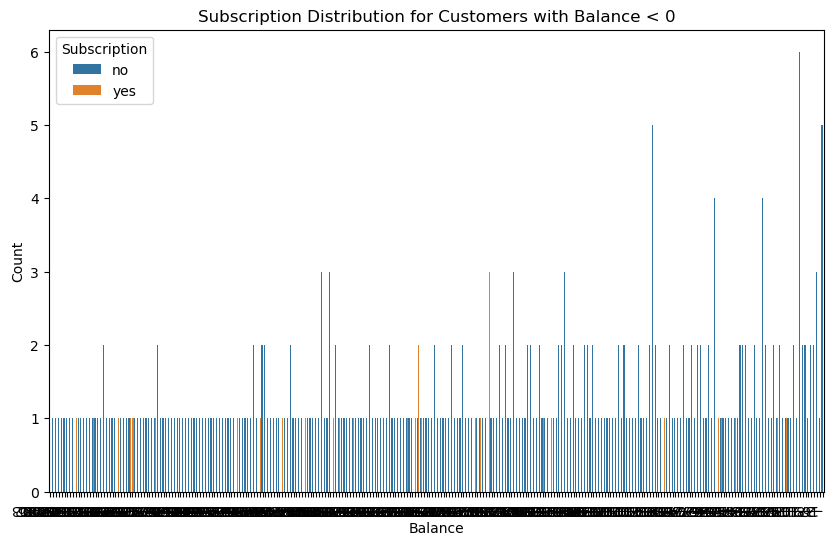

In [14]:
#moving on to question 10 
plt.figure(figsize=(10, 6))
sns.countplot(x='balance', hue='y', data=dfbank[dfbank['balance'] < 0])
plt.title('Subscription Distribution for Customers with Balance < 0')
plt.xlabel('Balance')
plt.ylabel('Count')
plt.legend(title='Subscription')
plt.xticks(rotation=180, ha='right')
plt.show()

In [16]:
#Use Pivot table to find the maximum balance for each type of job
pivot_table = dfbank.pivot_table(index='job', values='balance', aggfunc='max')
print(pivot_table)


               balance
job                   
admin.           22171
blue-collar      16353
entrepreneur     42045
housemaid        26965
management       27359
retired          71188
self-employed    16430
services         26394
student          11555
technician       27733
unemployed        9019
unknown           7337


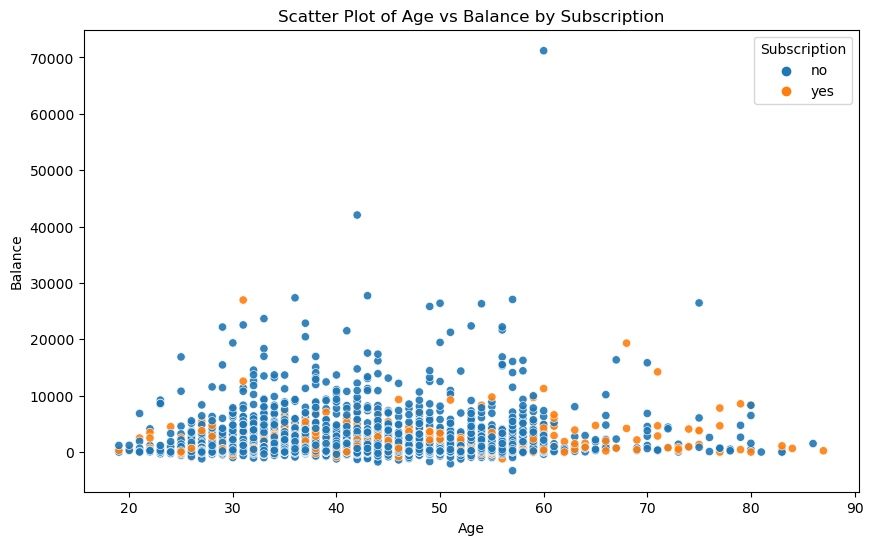

In [19]:
#Use the Age, balance, and Y column to plot the scatter plot and
#find what kind of relationship Age and balance had, and See the points which belong 0 and 1 class and how they are distributed.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='balance', hue='y', data=dfbank, alpha=0.9)
plt.title('Scatter Plot of Age vs Balance by Subscription')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.legend(title='Subscription')
plt.show()

Text(0, 0.5, 'Balance')

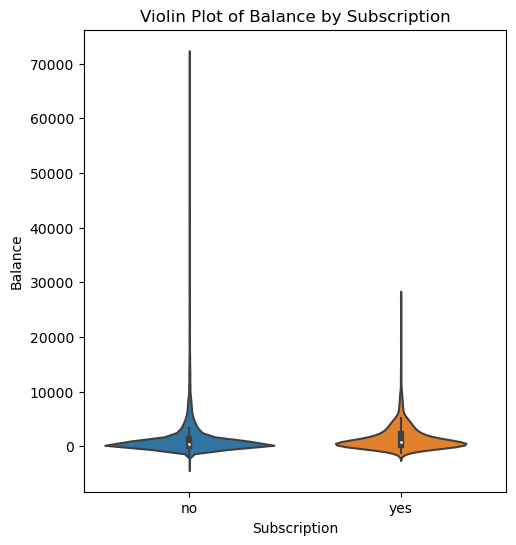

In [21]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.violinplot(x='y', y='balance', data=dfbank)
plt.title('Violin Plot of Balance by Subscription')
plt.xlabel('Subscription')
plt.ylabel('Balance')

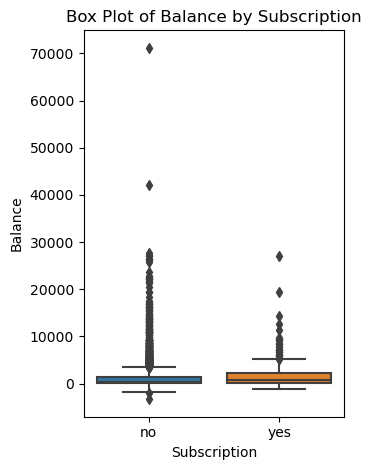

In [23]:
plt.subplot(1, 2, 2)
sns.boxplot(x='y', y='balance', data=dfbank)
plt.title('Box Plot of Balance by Subscription')
plt.xlabel('Subscription')
plt.ylabel('Balance')

plt.tight_layout()
plt.show()

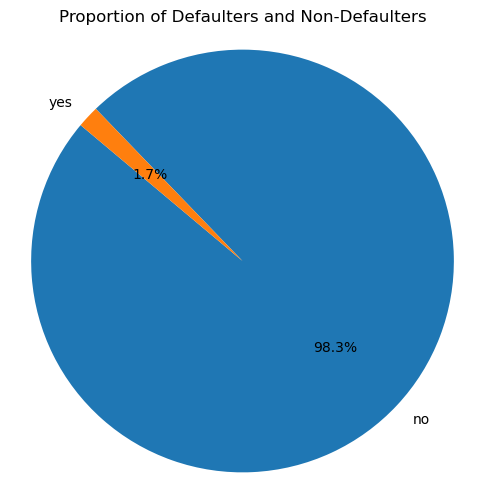

In [27]:
defaulter_distribution = dfbank['default'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(defaulter_distribution, labels=defaulter_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Defaulters and Non-Defaulters')
plt.axis('equal')
plt.show()

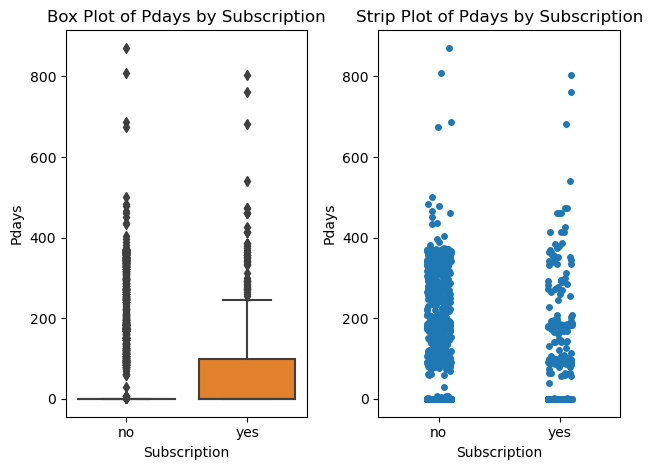

In [28]:
# Box plot
plt.subplot(1, 2, 1)
sns.boxplot(x='y', y='pdays', data=dfbank)
plt.title('Box Plot of Pdays by Subscription')
plt.xlabel('Subscription')
plt.ylabel('Pdays')

# Strip plot
plt.subplot(1, 2, 2)
sns.stripplot(x='y', y='pdays', data=dfbank, jitter=True)
plt.title('Strip Plot of Pdays by Subscription')
plt.xlabel('Subscription')
plt.ylabel('Pdays')

plt.tight_layout()
plt.show()
